In [1]:
import numpy as np
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as mp
#import pandas_datareader.data as web

In [3]:
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/sigma*sqrt(T)
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

In [4]:
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S+bs_call(S,K,T,r,sigma)

In [11]:
def call_implied_volatility(Price, S, K, T, r):
    sigma = 0.001
    while sigma < 1:
        Price_implied = S * \
            norm.cdf(d1(S, K, T, r, sigma))-K*exp(-r*T) * \
            norm.cdf(d2(S, K, T, r, sigma))
        if Price-(Price_implied) < 0.001:
            return sigma
        sigma += 0.001
    return "Not Found"

def put_implied_volatility(Price, S, K, T, r):
    sigma = 0.001
    while sigma < 1:
        Price_implied = K*exp(-r*T)-S+bs_call(S, K, T, r, sigma)
        if Price-(Price_implied) < 0.001:
            return sigma
        sigma += 0.001
    return "Not Found"



In [35]:
def call_delta(S,K,T,r,sigma):
    print(T)
    print(d1(S,K,T,r,sigma))
    return norm.cdf(d1(S,K,T,r,sigma))
def call_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def call_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def call_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) - r*K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))
def call_rho(S,K,T,r,sigma):
    return 0.01*(K*T*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))
    
def put_delta(S,K,T,r,sigma):
    return -norm.cdf(-d1(S,K,T,r,sigma))
def put_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def put_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def put_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) + r*K*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))
def put_rho(S,K,T,r,sigma):
    return 0.01*(-K*T*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))

In [40]:


expiry = '05-18-2021'
strike_call = 20
strike_put = 10

today = datetime.now()
#one_year_ago = today.replace(year=today.year-1)

#df = web.DataReader(stock, 'yahoo', one_year_ago, today)


returns = np.random.normal(loc=0.0008, scale=0.02, size=1000)

sigma = np.sqrt(252) * returns.std() #annualized std
uty = 0 #riskfree APY
lcp = 19.5 #last closing price
t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365

print('Call: ', bs_call(lcp, strike_call, t, uty, sigma))
print('Put: ', bs_put(lcp, strike_put, t, uty, sigma))

Call:  0.4508590153318899
Put:  -2.277835885111166


In [9]:
prices=np.ones(len(returns))
prices[-1]=lcp
for i in range(len(returns)-1,0,-1):
    prices[i-1]=(prices[i]/(np.exp(returns[i])))

In [13]:
print("Implied Volatility: " +
      str(100 * call_implied_volatility(3.7, lcp, strike_call, t, uty,)) + " %")

Implied Volatility: Not FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot FoundNot Found %


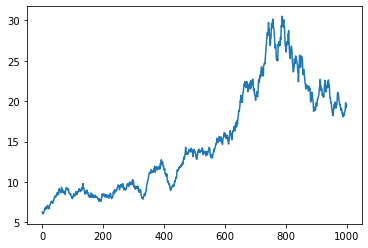

In [14]:
mp.plot(prices)

In [46]:
xrange = np.arange(1,10,0.1)
yrange = [call_delta(strike_call,strike_call*xval,t,uty,sigma) for xval in xrange]

0.07945205479452055
0.003478218441785686
0.07945205479452055
-0.08301114617878949
0.07945205479452055
-0.1619697498247447
0.07945205479452055
-0.23460462412051725
0.07945205479452055
-0.30185401382950444
0.07945205479452055
-0.36446169781988397
0.07945205479452055
-0.4230272749513082
0.07945205479452055
-0.4780411783143168
0.07945205479452055
-0.5299096660864144
0.07945205479452055
-0.5789730465570703
0.07945205479452055
-0.6255192229464474
0.07945205479452055
-0.6697939300911742
0.07945205479452055
-0.7120085875670227
0.07945205479452055
-0.7523464057193876
0.07945205479452055
-0.7909671912129779
0.07945205479452055
-0.8280111709415865
0.07945205479452055
-0.8636020655087502
0.07945205479452055
-0.8978495823480841
0.07945205479452055
-0.9308514552177375
0.07945205479452055
-0.9626951256462811
0.07945205479452055
-0.993459139208117
0.07945205479452055
-1.0232143127667448
0.07945205479452055
-1.0520247163395413
0.07945205479452055
-1.0799485038286922
0.07945205479452055
-1.1070386197025

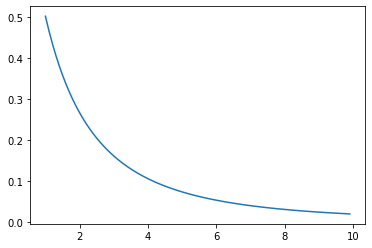

In [47]:
mp.plot(xrange,yrange)

In [50]:
t*365

29.000000000000004